# 6.1 Show that a 3x5 MA is equivalent to a 7-term weighted moving average  with weights of 0.067, 0.133, 0.200, 0.200, 0.200, 0.133, and 0.067.

$
3\times 5 MA = \frac{1}{3} [\frac{1}{5} (y_1 + y_2 + y_3 + y_4 + y_5) + \frac{1}{5} (y_2 + y_3 + y_4 + y_5 + y_6) + \frac{1}{5} (y_3 + y_4 + y_5 + y_6 + y_7)] = \frac{1}{15} y_1 + \frac{2}{15} y_2 + \frac{3}{15} y_3 + \frac{3}{15} y_4 + \frac{3}{15} y_5 + \frac{2}{15} y_6 + \frac{1}{15} y_7
$

# 6.2 The plastics data set consists of the monthly sales (in thousands) of product A for a plastics manufacturer for five years.

## a. Plot the time series of sales of product A. Can you identify seasonal fluctuations and/or a trend-cycle?

In [1]:
install.packages("seasonal")  


  There is a binary version available but the source version is later:
         binary source needs_compilation
seasonal  1.8.0  1.8.1             FALSE



installing the source package 'seasonal'



In [2]:
install.packages("fpp2")

package 'fpp2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Ilya\AppData\Local\Temp\RtmpuqLxPz\downloaded_packages


In [3]:
library(fpp2)

Warning message:
"package 'fpp2' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
-- Attaching packages ---------------------------------------------- fpp2 2.4 --
v ggplot2   3.3.3     v fma       2.4  
v forecast  8.13      v expsmooth 2.3  
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'forecast' was built under R version 3.6.3"Warning message:
"package 'fma' was built under R version 3.6.3"Warning message:
"package 'expsmooth' was built under R version 3.6.3"


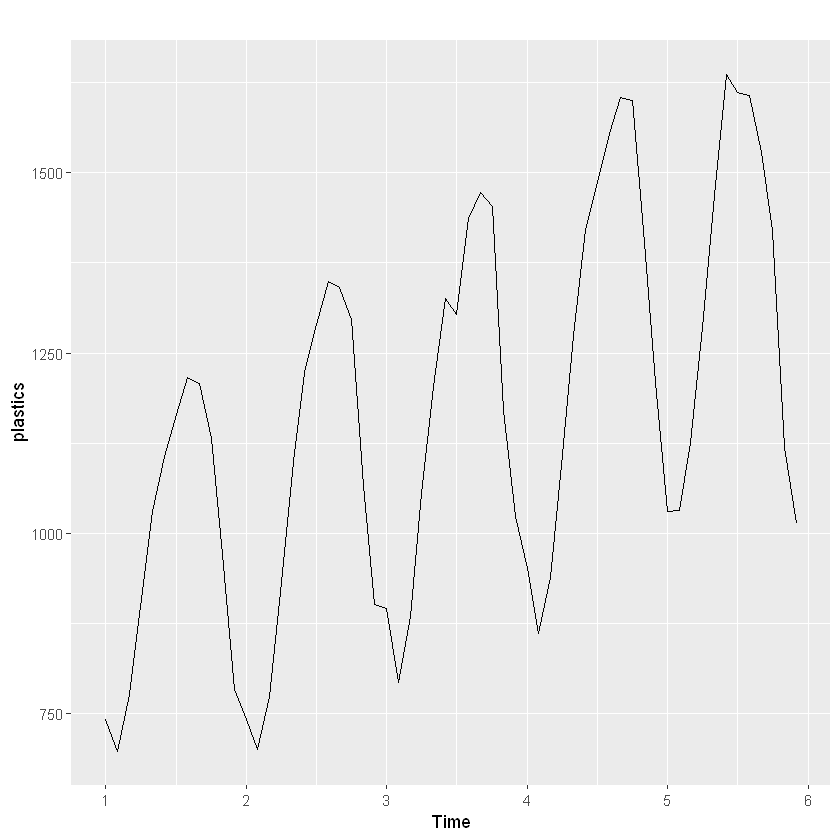

In [4]:
autoplot(plastics)

## b. Use a classical multiplicative decomposition to calculate the trend-cycle and seasonal indices.

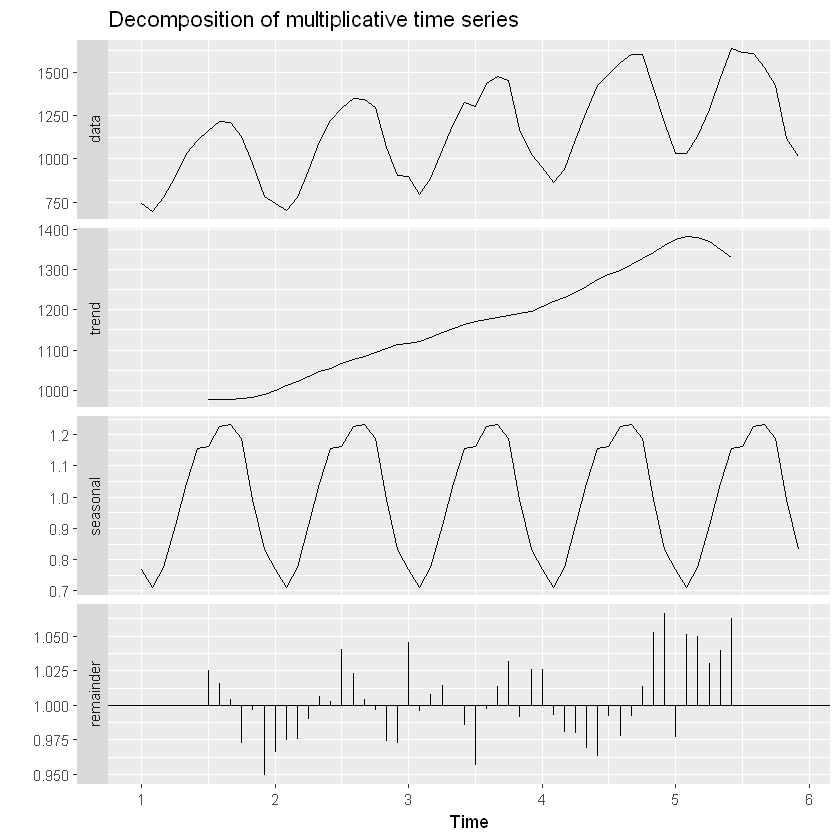

In [5]:
decompose_plastics<-decompose(plastics, type= "multiplicative")
autoplot(decompose_plastics)

## d. Compute and plot the seasonally adjusted data.

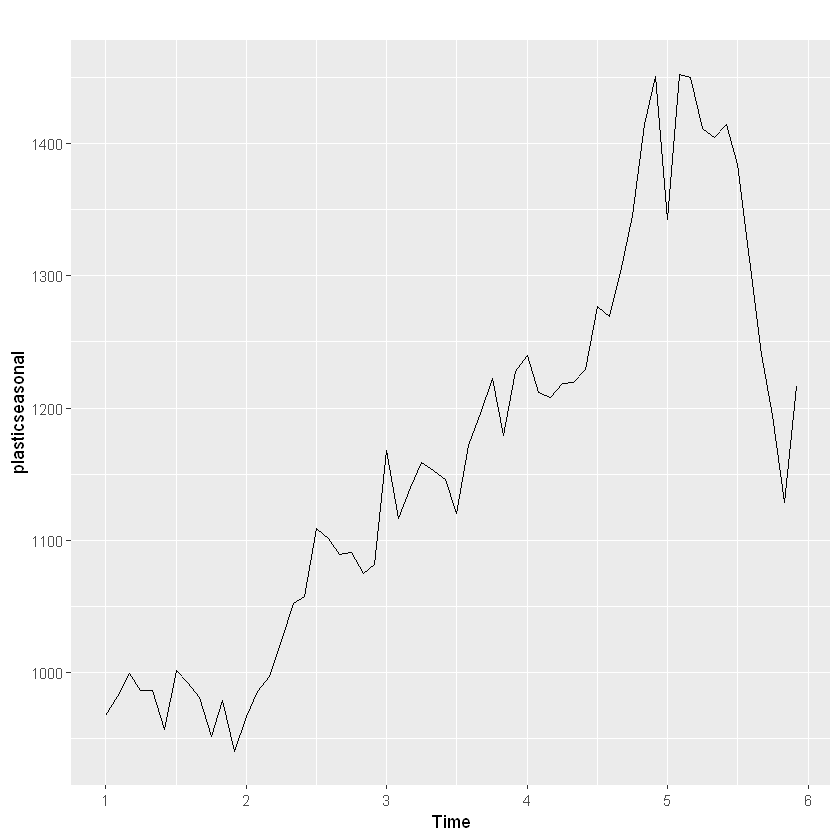

In [6]:
plasticseasonal<-decompose_plastics$x/decompose_plastics$seasonal
autoplot(plasticseasonal)

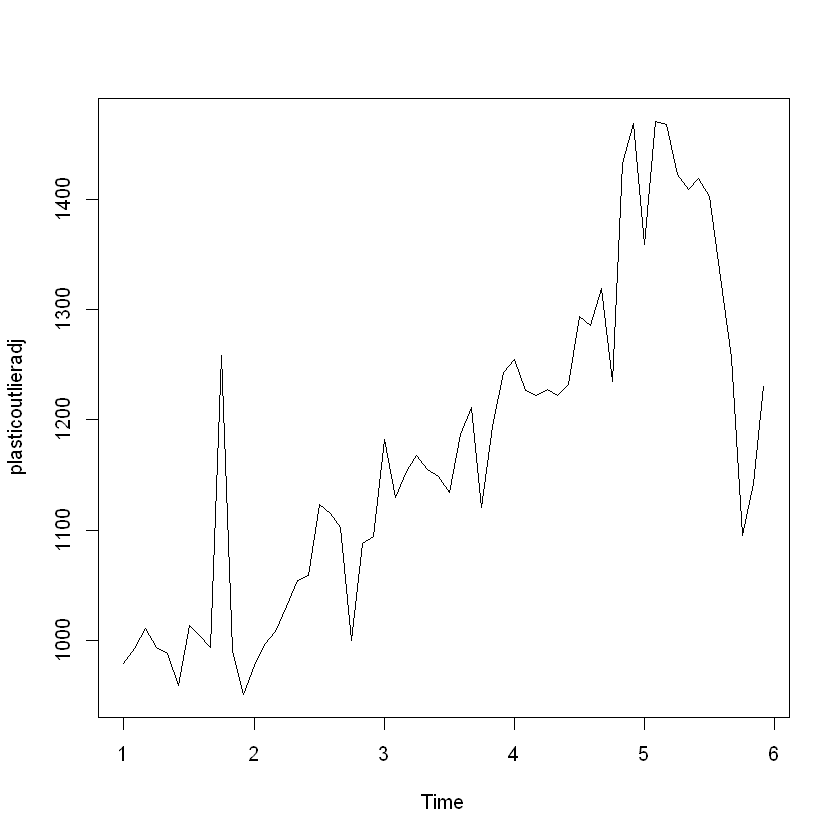

In [7]:
plasticoutlier <- plastics
plasticoutlier[10] <- plasticoutlier[10] + 500
decomposeoutlier <- decompose(plasticoutlier, "multiplicative")
plasticoutlieradj <- decomposeoutlier$x / decomposeoutlier$seasonal
plot(plasticoutlieradj)

# 3.

In [8]:
retaildata<-readxl::read_excel("retail.xlsx", skip=1)

In [9]:
head(retaildata)

Series ID,A3349335T,A3349627V,A3349338X,A3349398A,A3349468W,A3349336V,A3349337W,A3349397X,A3349399C,...,A3349333L,A3349860R,A3349464L,A3349389X,A3349461F,A3349788J,A3349547V,A3349388W,A3349870V,A3349396W
1982-04-01,303.1,41.7,63.9,408.7,65.8,91.8,53.6,211.3,94.0,...,460.1,135.1,64.9,125.6,153.5,479.1,146.3,196.1,342.4,3396.4
1982-05-01,297.8,43.1,64.0,404.9,65.8,102.6,55.4,223.8,105.7,...,502.6,134.9,67.7,128.7,154.8,486.1,145.5,196.6,342.1,3497.9
1982-06-01,298.0,40.3,62.7,401.0,62.3,105.0,48.4,215.7,95.1,...,443.8,128.2,65.5,125.0,148.8,467.5,140.2,188.5,328.7,3357.8
1982-07-01,307.9,40.9,65.6,414.4,68.2,106.0,52.1,226.3,95.3,...,459.1,129.9,68.5,136.6,156.1,491.1,146.5,192.0,338.5,3486.8
1982-08-01,299.2,42.1,62.6,403.8,66.0,96.9,54.2,217.1,82.8,...,438.4,133.0,65.2,134.7,152.8,485.7,138.8,192.7,331.5,3355.9
1982-09-01,305.4,42.0,64.4,411.8,62.3,97.5,53.6,213.4,89.4,...,465.1,135.5,66.8,130.4,157.2,489.9,144.3,197.6,341.9,3454.3


In [10]:
myts <- ts(retaildata[,"A3349873A"],
  frequency=12, start=c(1982,4))

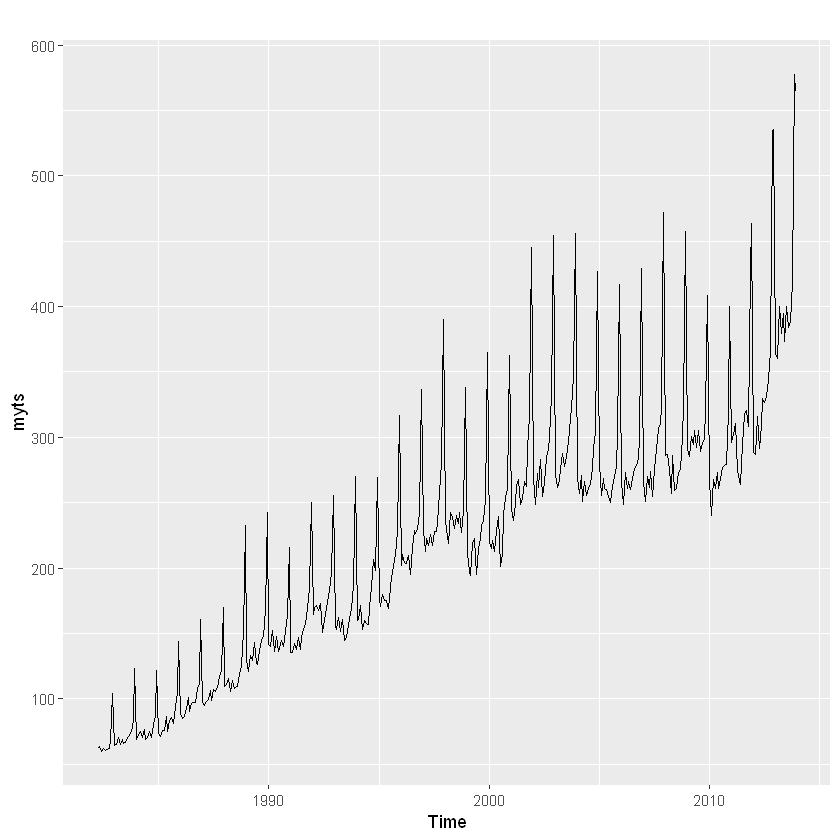

In [11]:
autoplot(myts)

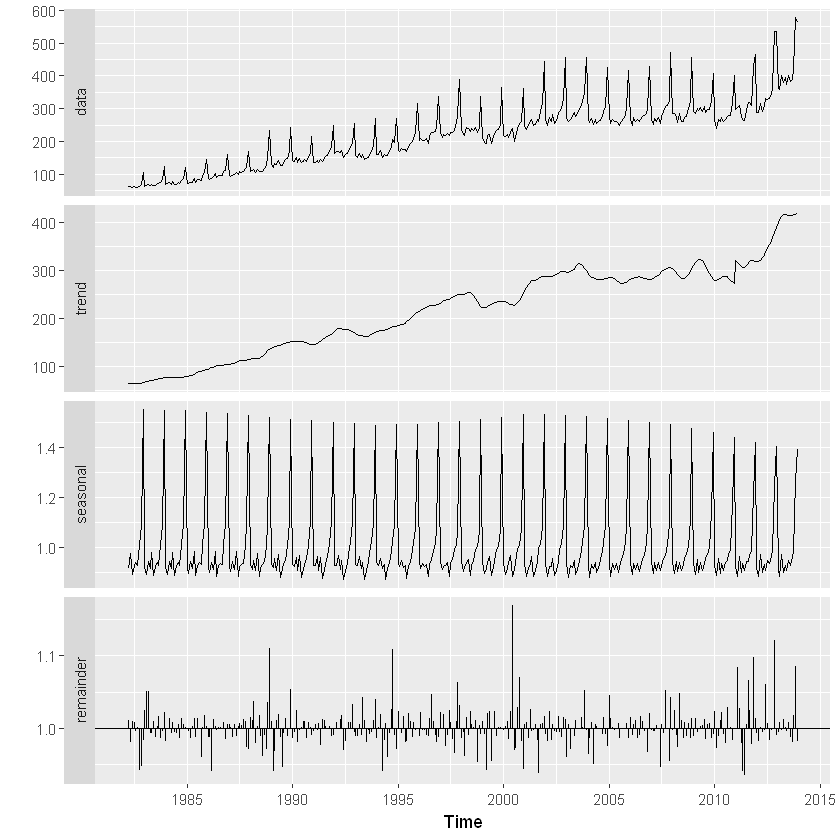

In [12]:
library(seasonal)
myts %>% seas(x11="") -> fit
autoplot(fit)

# 4. Figures 6.16 and 6.17 show the result of decomposing the number of persons in the civilian labour force in Australia each month from February 1978 to August 1995.



# 5.  This exercise uses the cangas data (monthly Canadian gas production in billions of cubic metres, January 1960 – February 2005).
## a. Plot the data using autoplot(), ggsubseriesplot() and ggseasonplot() to look at the effect of the changing seasonality over time. What do you think is causing it to change so much?


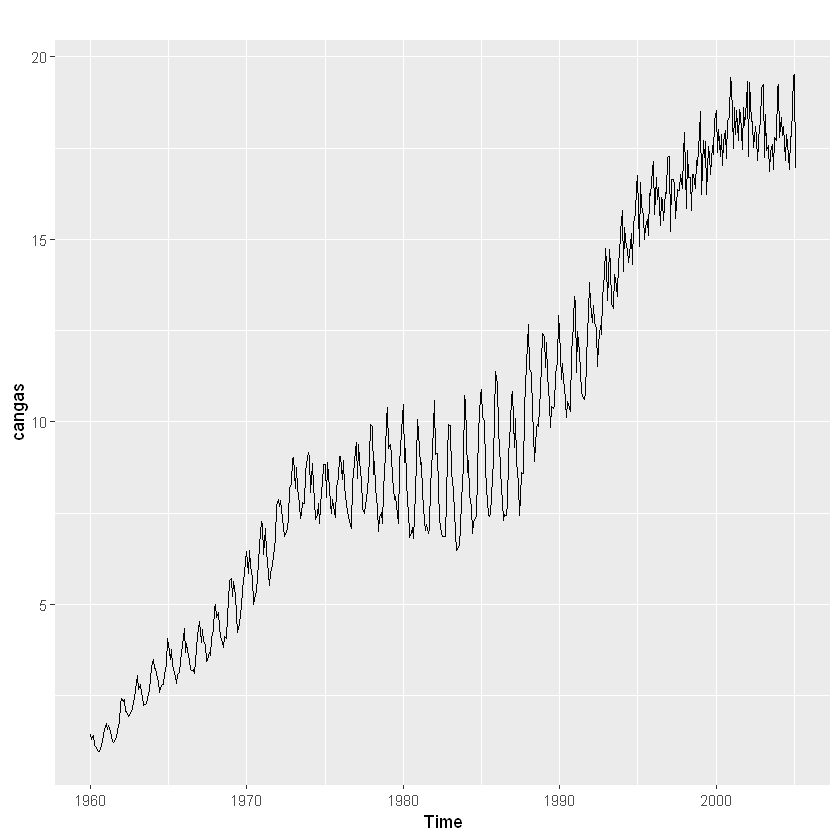

In [13]:
autoplot(cangas)

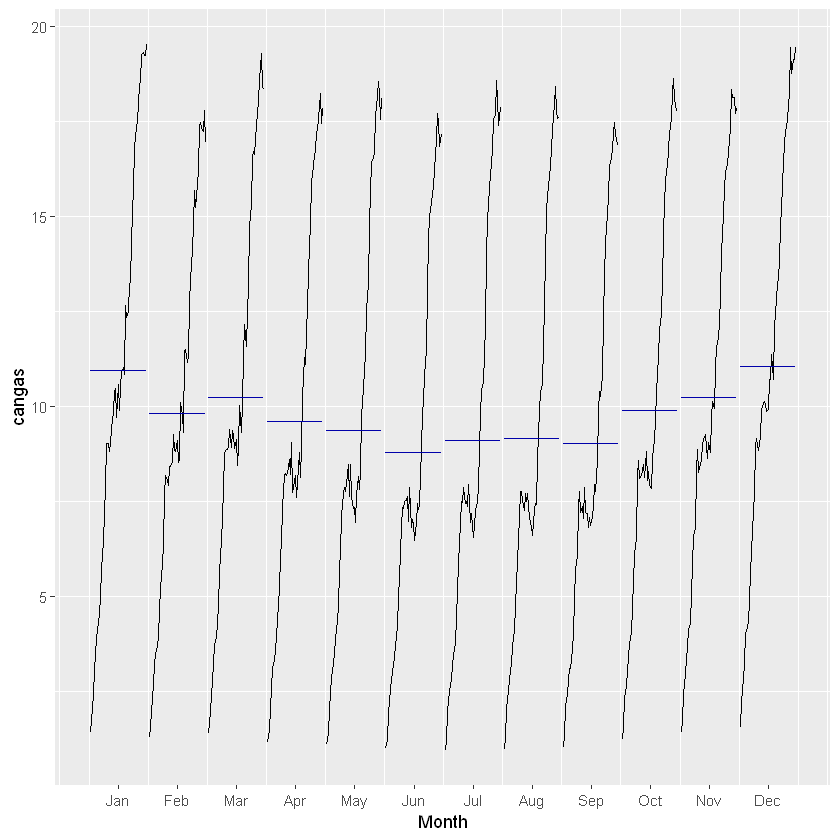

In [14]:
ggsubseriesplot(cangas)

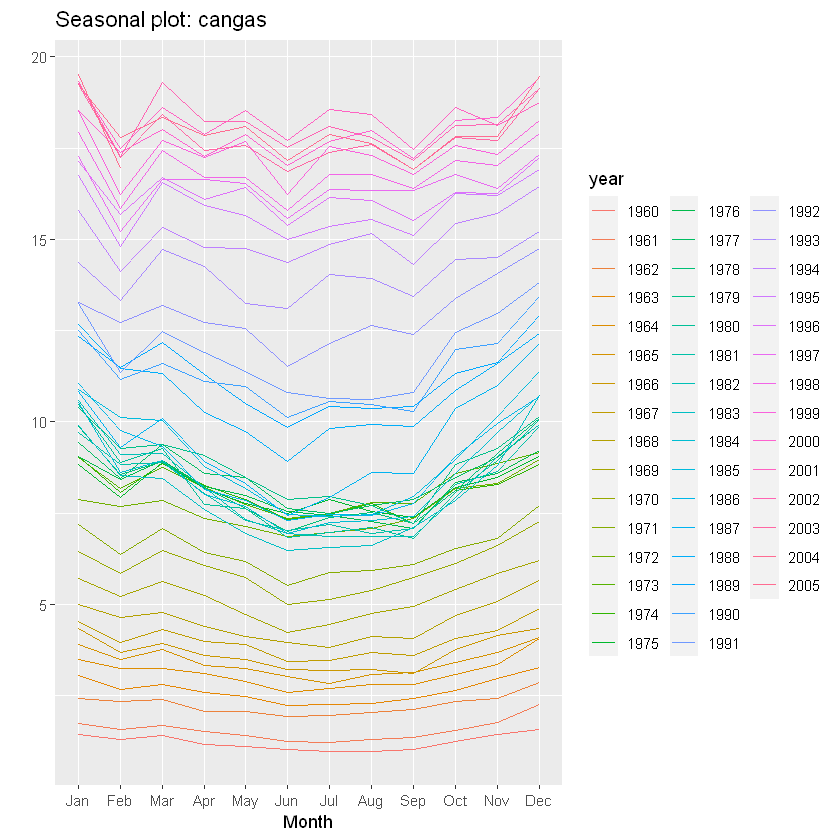

In [15]:
ggseasonplot(cangas)

## b. Do an STL decomposition of the data. You will need to choose s.window to allow for the changing shape of the seasonal component.

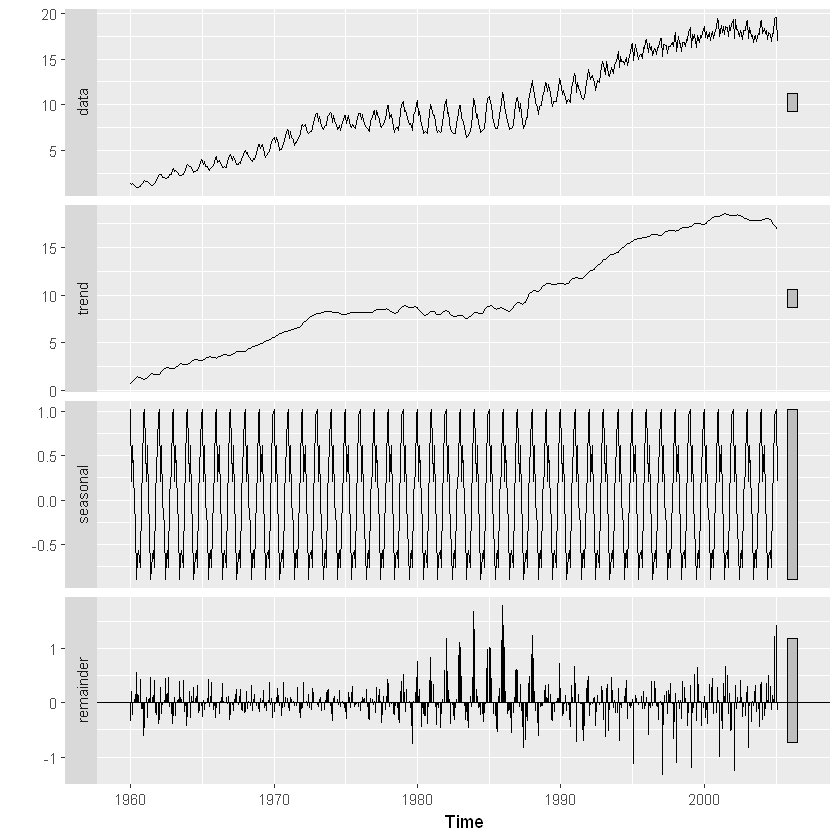

In [16]:
cangas %>%
  stl(t.window=12, s.window="periodic", robust=TRUE) %>%
  autoplot()

# c. Compare the results with those obtained using SEATS and X11. How are they different?

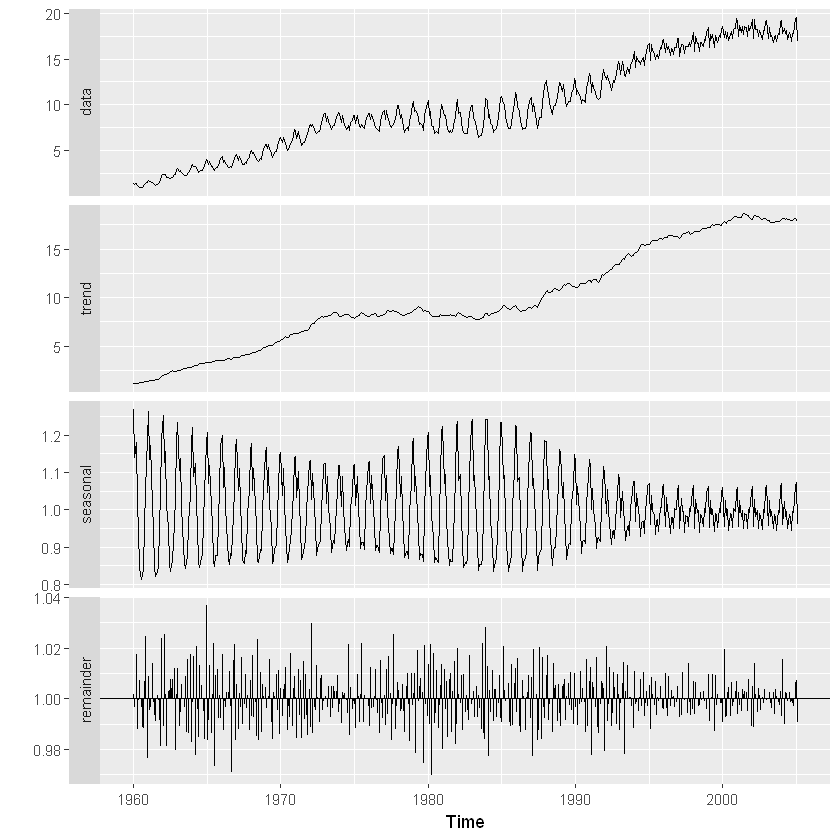

In [17]:
cangas %>% seas() -> fit
autoplot(fit)

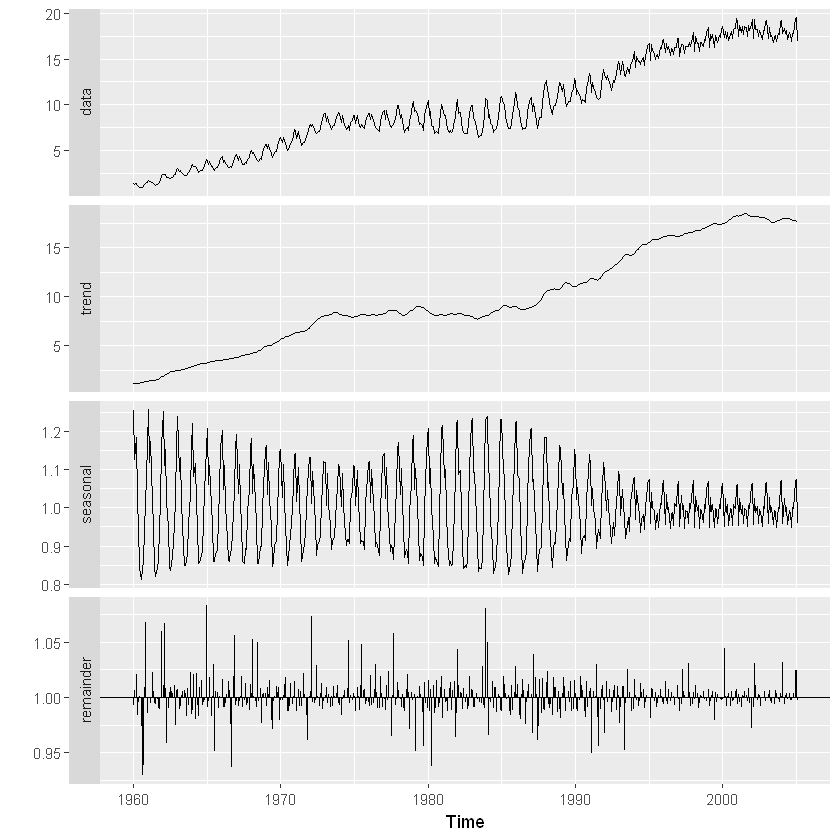

In [18]:
cangas %>% seas(x11="") -> fit
autoplot(fit)

# 6.We will use the bricksq data (Australian quarterly clay brick production. 1956–1994) for this exercise.

## a.Use an STL decomposition to calculate the trend-cycle and seasonal indices. (Experiment with having fixed or changing seasonality.)

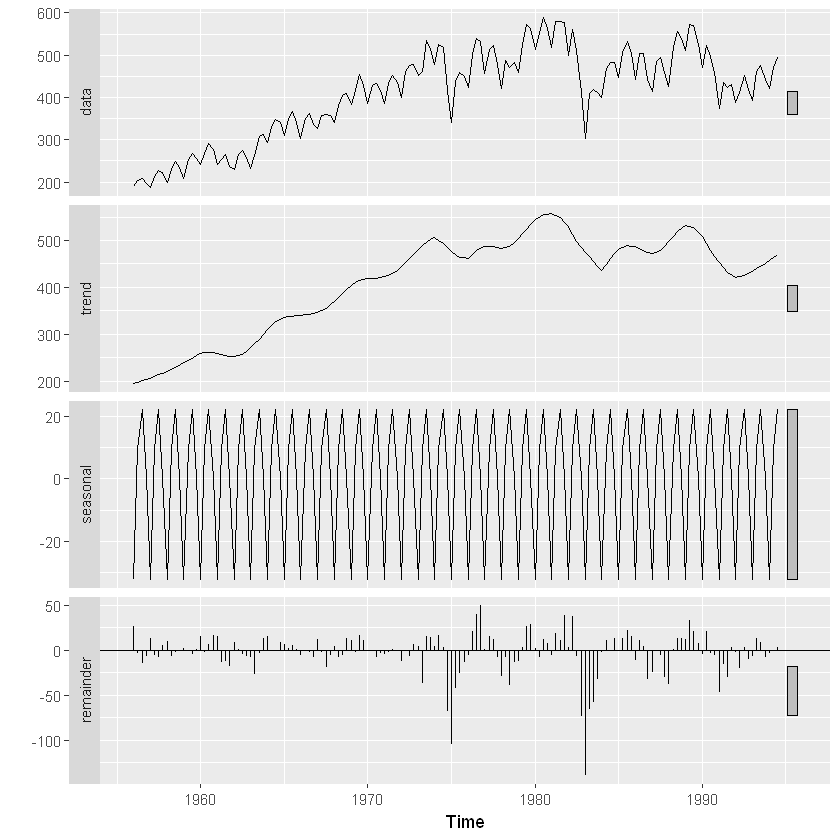

In [19]:
bricksq %>%
stl(t.window=12, s.window="periodic", robust=TRUE) %>%
autoplot()

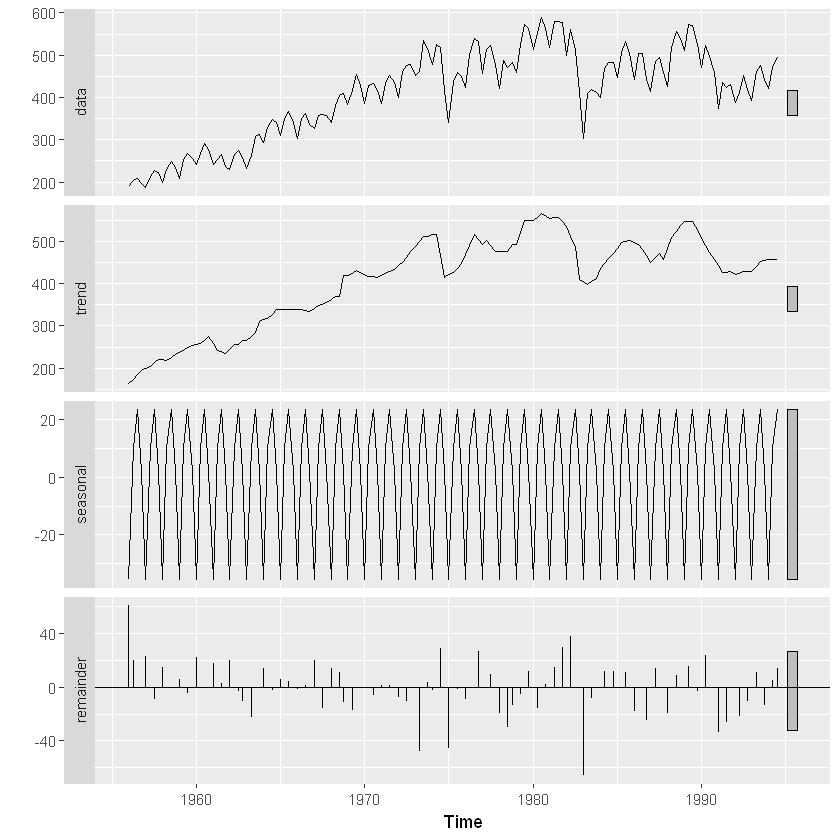

In [20]:
bricksq %>%
stl(t.window=4, s.window="periodic", robust=TRUE) %>%
autoplot()

## b. Compute and plot the seasonally adjusted data.

In [21]:
brkstl <- stl(bricksq, t.window=12, s.window="periodic", robust=TRUE)

In [22]:
brksa <- seasadj(brkstl)

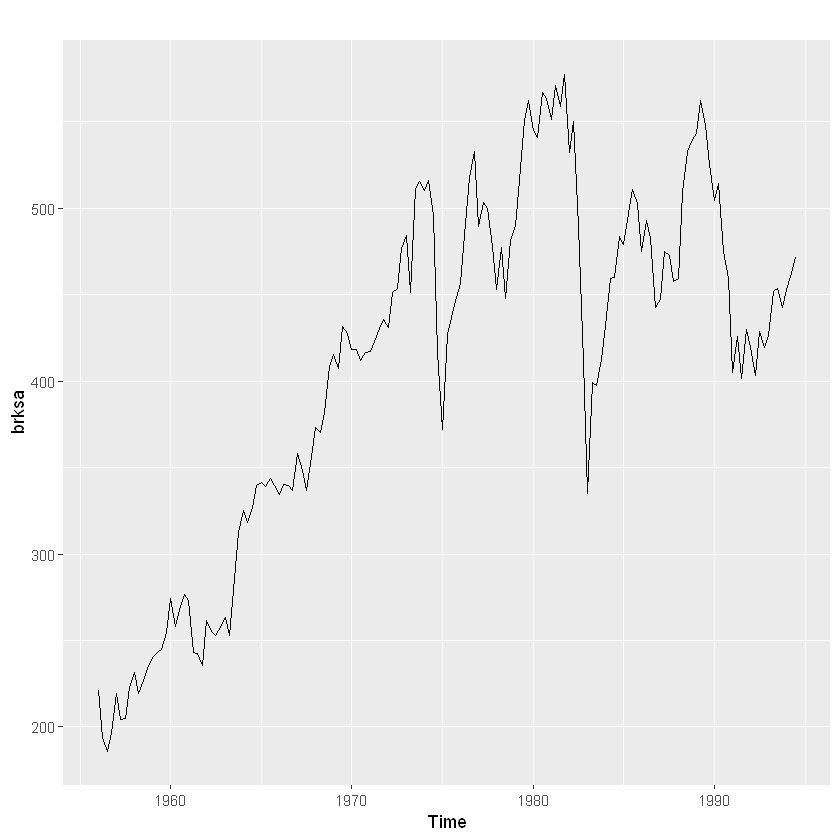

In [23]:
autoplot(brksa)

## c.Use a naive method to produce forecasts of the seasonally adjusted data.

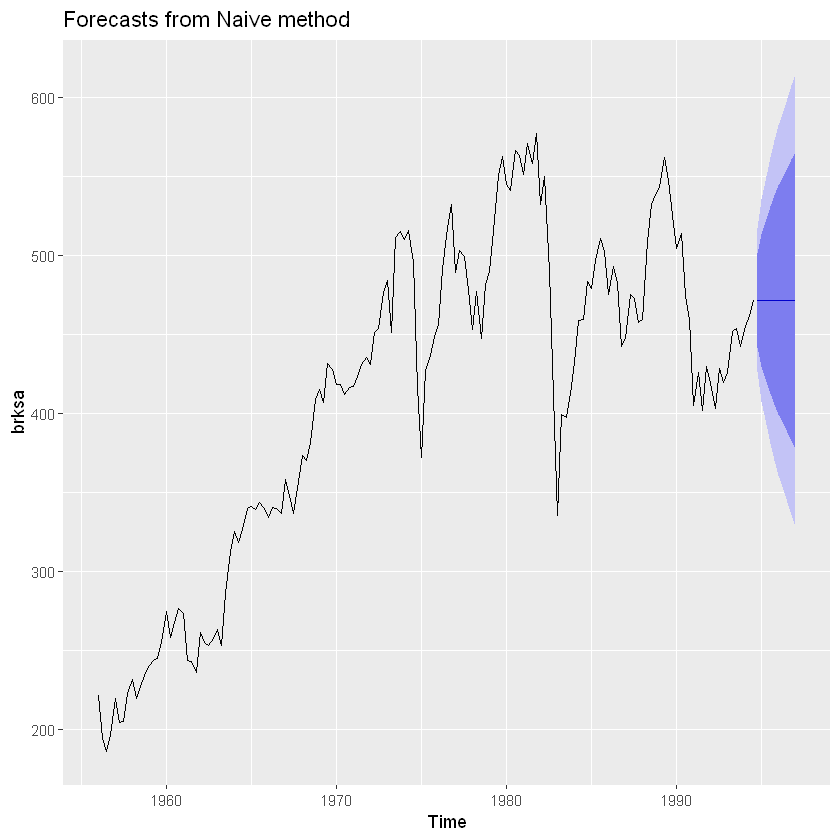

In [24]:
autoplot(naive(brksa))

## d.Use stlf() to reseasonalise the results, giving forecasts for the original data.

In [25]:
fit1 <- stlf(bricksq)
fit1

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1994 Q4       465.7326 437.4903 493.9748 422.5398 508.9254
1995 Q1       424.6727 384.7119 464.6335 363.5580 485.7874
1995 Q2       483.9914 435.0232 532.9595 409.1010 558.8817
1995 Q3       493.9988 437.4242 550.5734 407.4754 580.5222
1995 Q4       465.7326 402.4454 529.0198 368.9431 562.5220
1996 Q1       424.6727 355.3067 494.0387 318.5865 530.7589
1996 Q2       483.9914 409.0259 558.9568 369.3416 598.6411
1996 Q3       493.9988 413.8128 574.1848 371.3650 616.6326

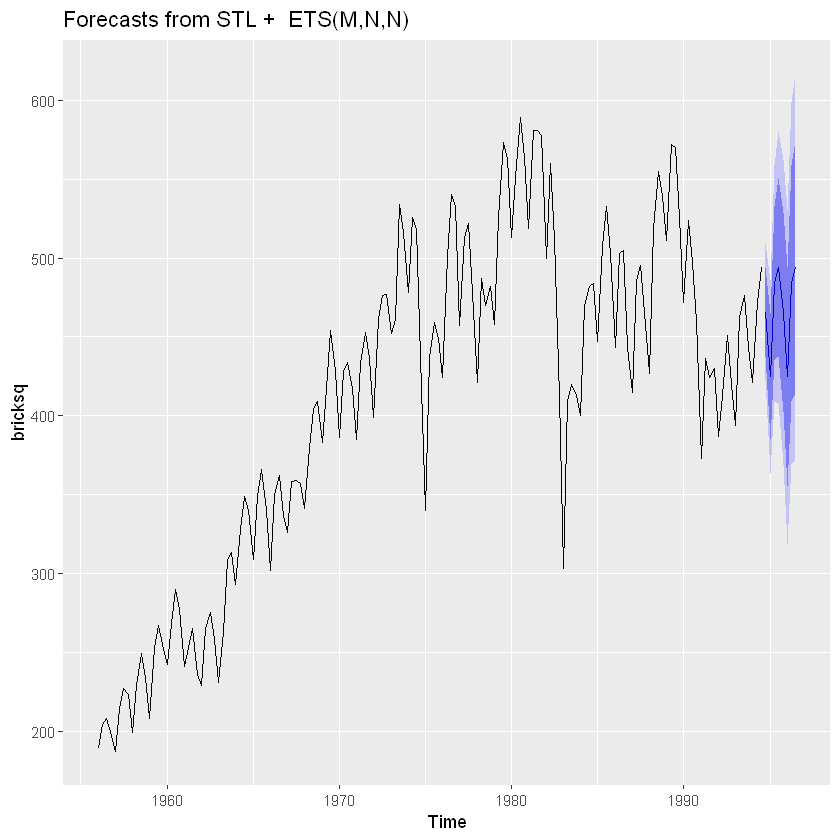

In [26]:
autoplot(fit1)

## e. Do the residuals look uncorrelated?

Warning message in checkresiduals(fit1):
"The fitted degrees of freedom is based on the model used for the seasonally adjusted data."


	Ljung-Box test

data:  Residuals from STL +  ETS(M,N,N)
Q* = 41.128, df = 6, p-value = 2.733e-07

Model df: 2.   Total lags used: 8



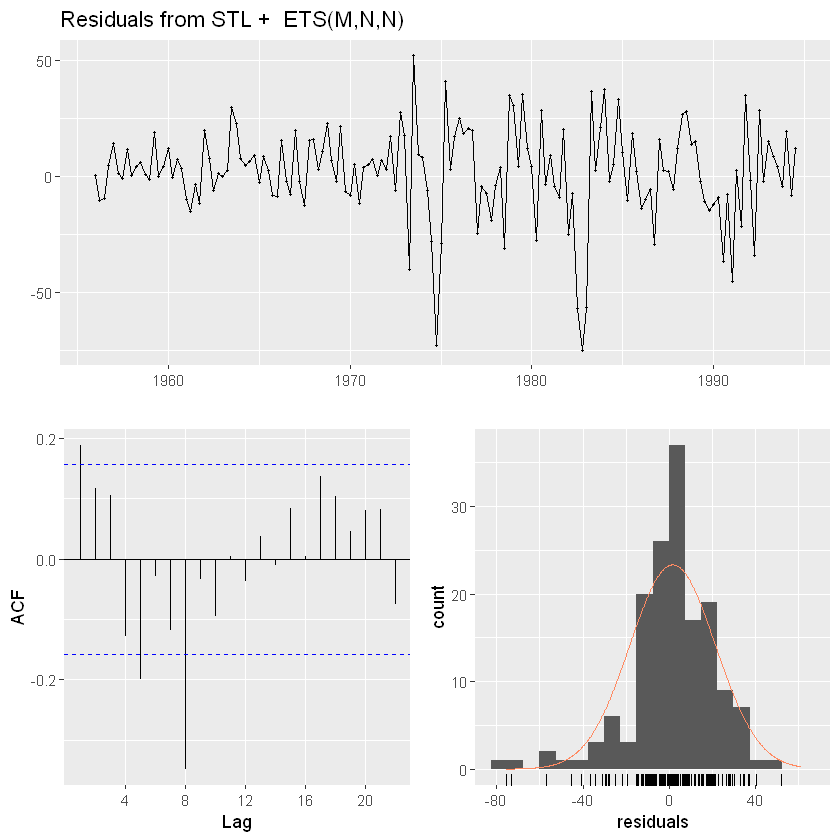

In [27]:
checkresiduals(fit1)

## f. Repeat with a robust STL decomposition. Does it make much difference?

In [28]:
fitr <- stlf(bricksq, robust=TRUE)
fitr

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1994 Q4       462.2355 432.9988 491.4723 417.5217 506.9493
1995 Q1       423.5662 382.1965 464.9358 360.2967 486.8356
1995 Q2       486.4525 435.7558 537.1492 408.9186 563.9864
1995 Q3       493.9985 435.4245 552.5726 404.4173 583.5798
1995 Q4       462.2355 396.7089 527.7621 362.0212 562.4498
1996 Q1       423.5662 351.7427 495.3896 313.7216 533.4107
1996 Q2       486.4525 408.8280 564.0770 367.7360 605.1689
1996 Q3       493.9985 410.9649 577.0322 367.0096 620.9875

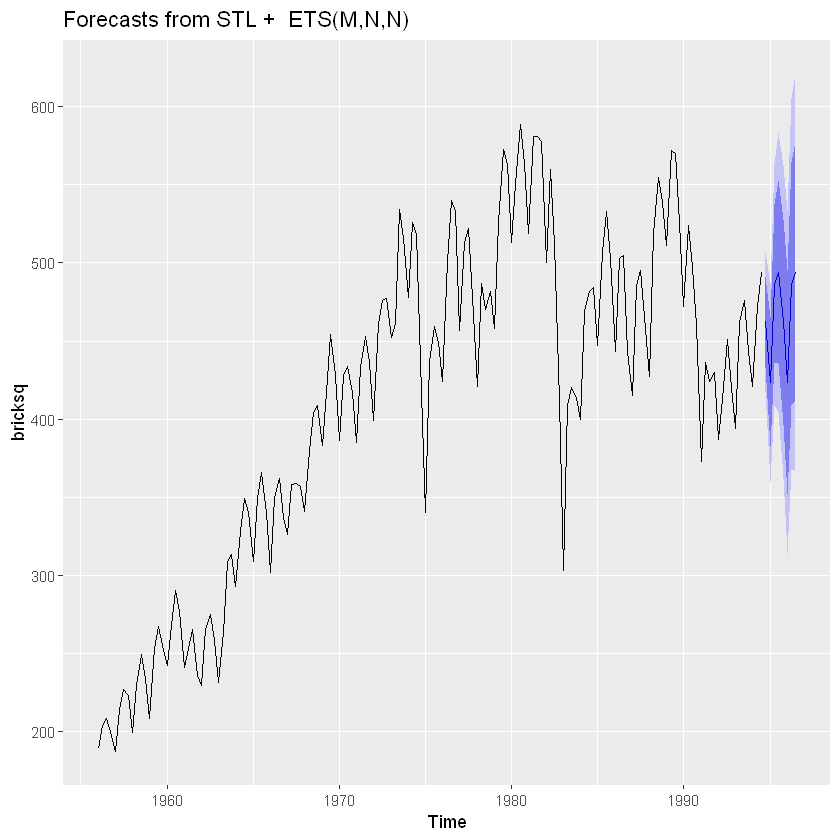

In [29]:
autoplot(fitr)

Warning message in checkresiduals(fitr):
"The fitted degrees of freedom is based on the model used for the seasonally adjusted data."


	Ljung-Box test

data:  Residuals from STL +  ETS(M,N,N)
Q* = 28.163, df = 6, p-value = 8.755e-05

Model df: 2.   Total lags used: 8



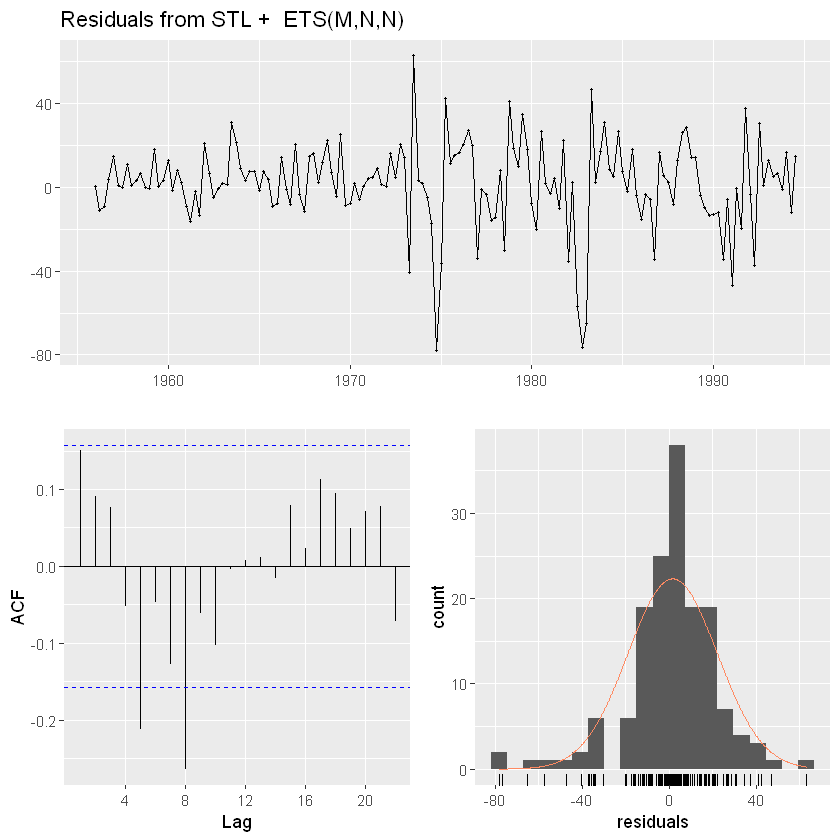

In [30]:
checkresiduals(fitr)

## g.Compare forecasts from stlf() with those from snaive(), using a test set comprising the last 2 years of data. Which is better?

In [31]:
train<-window(bricksq, end=c(1992,3))
test<-window(bricksq, start=c(1992,4), end=c(1994,3))
train

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Qtr1,Qtr2,Qtr3,Qtr4
1956,189,204,208,197
1957,187,214,227,223
1958,199,229,249,234
1959,208,253,267,255
1960,242,268,290,277
1961,241,253,265,236
1962,229,265,275,258
1963,231,263,308,313
1964,293,328,349,340
1965,309,349,366,340


In [32]:
test

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Qtr1,Qtr2,Qtr3,Qtr4
1992,,,,420
1993,394,462,476,443
1994,421,472,494,


In [33]:
bn<-snaive(train)
bstlf<-stlf(train)
fbn<-forecast(bn,h=8)
fbstlf<-forecast(bstlf,h=8)

In [34]:
fbn

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1992 Q4            430 366.2905 493.7095 332.5647 527.4353
1993 Q1            387 323.2905 450.7095 289.5647 484.4353
1993 Q2            413 349.2905 476.7095 315.5647 510.4353
1993 Q3            451 387.2905 514.7095 353.5647 548.4353
1993 Q4            430 339.9011 520.0989 292.2056 567.7944
1994 Q1            387 296.9011 477.0989 249.2056 524.7944
1994 Q2            413 322.9011 503.0989 275.2056 550.7944
1994 Q3            451 360.9011 541.0989 313.2056 588.7944

In [35]:
fbstlf

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1992 Q4       423.9034 397.7584 450.0484 383.9181 463.8887
1993 Q1       378.9095 341.9154 415.9036 322.3319 435.4871
1993 Q2       441.9958 396.6620 487.3296 372.6637 511.3279
1993 Q3       450.9971 398.6202 503.3739 370.8936 531.1006
1993 Q4       423.9034 365.3107 482.4961 334.2936 513.5132
1994 Q1       378.9095 314.6874 443.1316 280.6903 477.1287
1994 Q2       441.9958 372.5879 511.4036 335.8457 548.1459
1994 Q3       450.9971 376.7541 525.2401 337.4523 564.5419

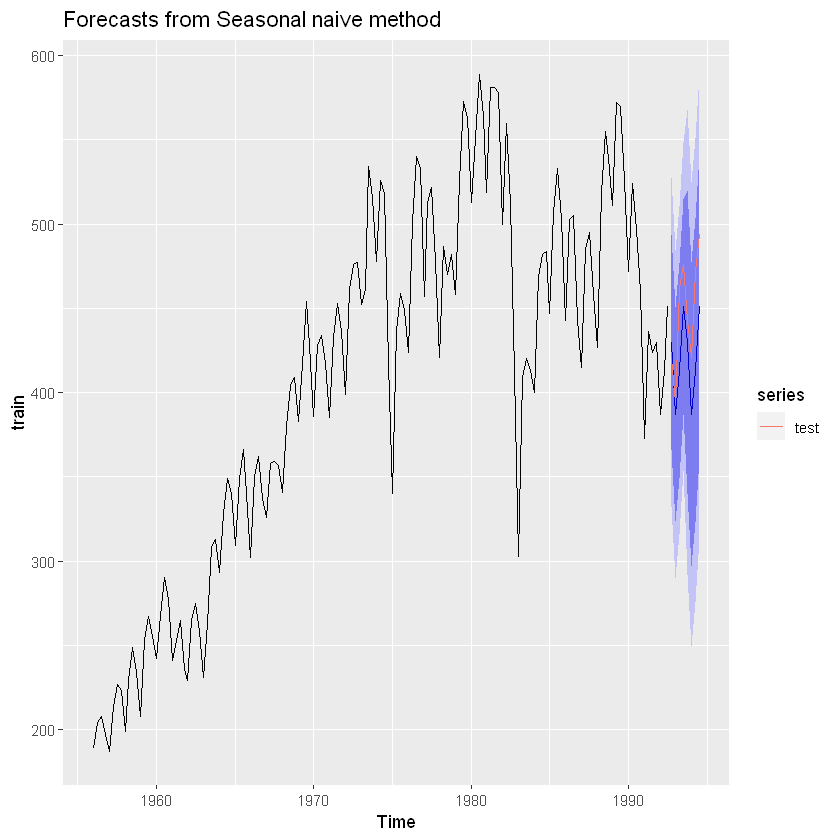

In [36]:
autoplot(fbn) + autolayer(test)

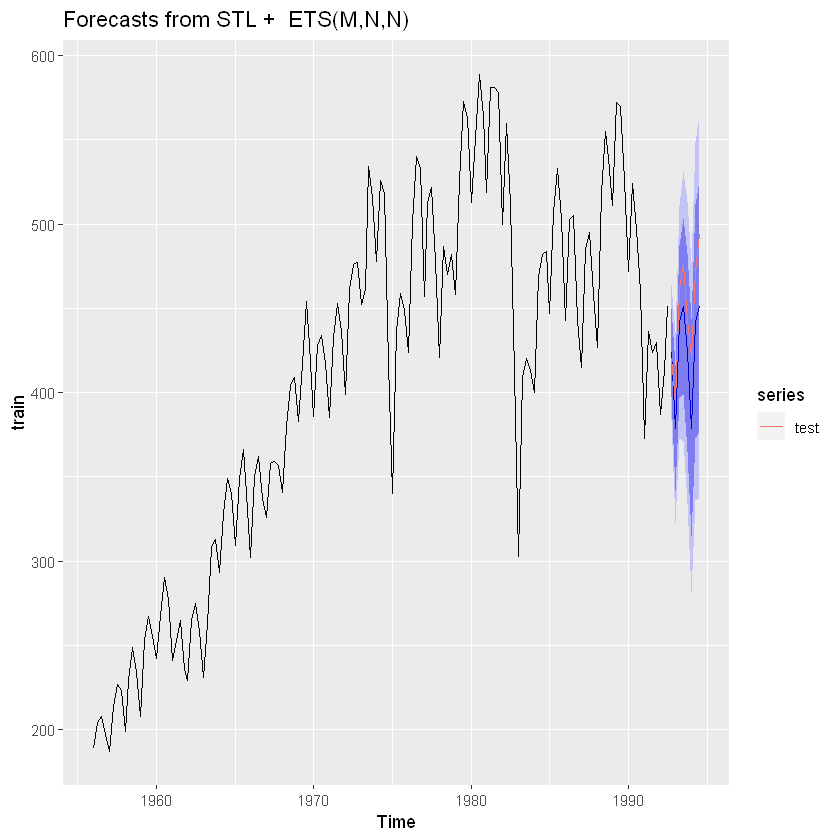

In [37]:
autoplot(fbstlf) + autolayer(test)

# 7.Use stlf() to produce forecasts of the writing series with either method=“naive” or method=“rwdrift”, whichever is most appropriate. Use the lambda argument if you think a Box-Cox transformation is required.

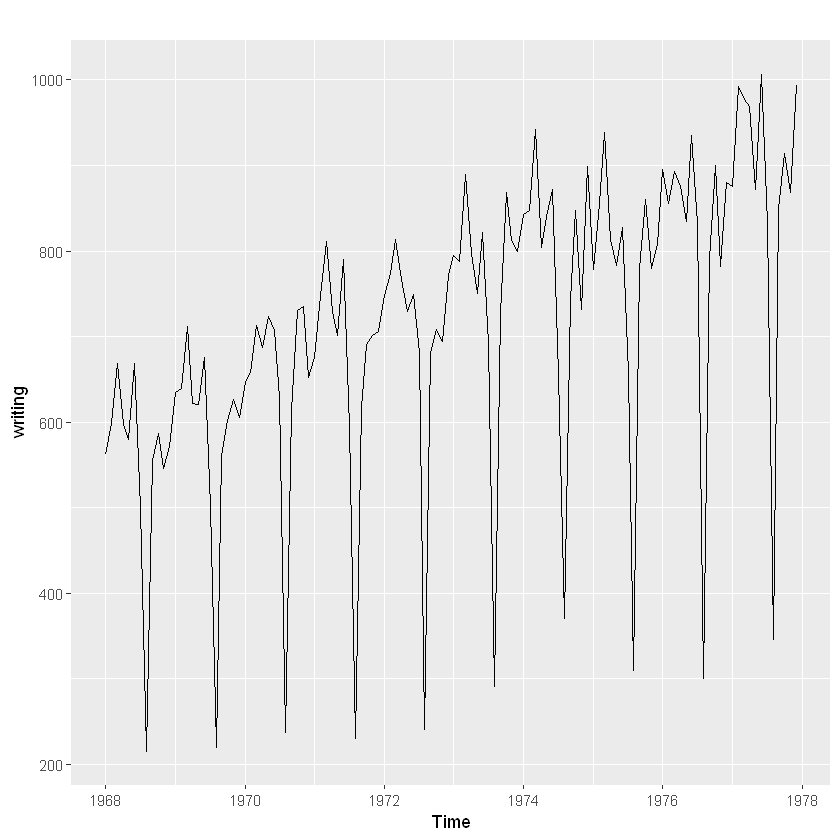

In [38]:
autoplot(writing)

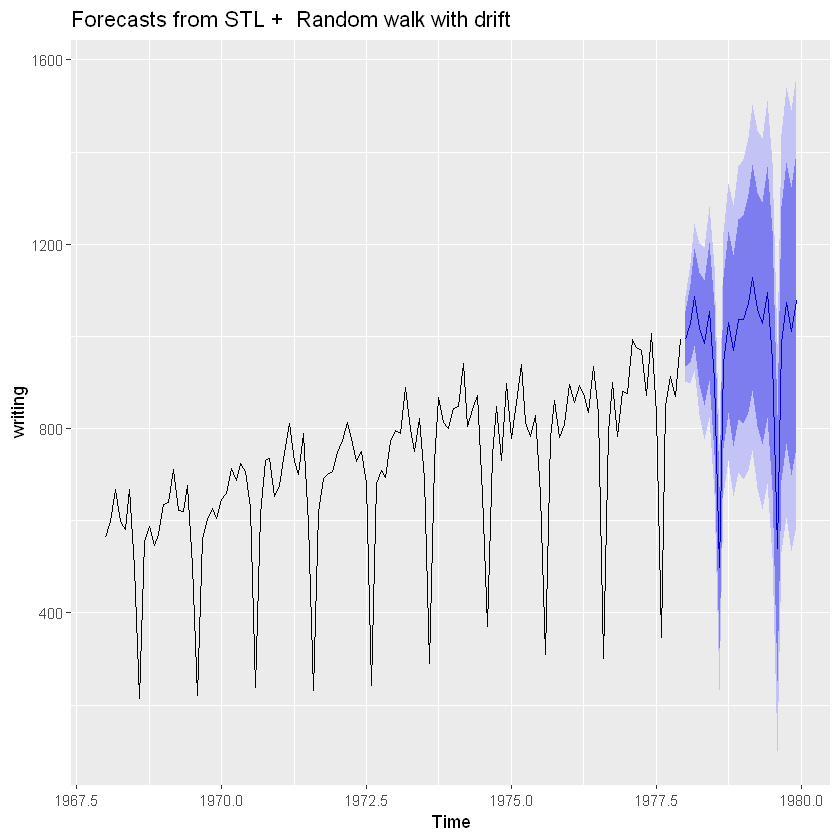

In [39]:
autoplot(stlf(writing, method='rwdrift'))

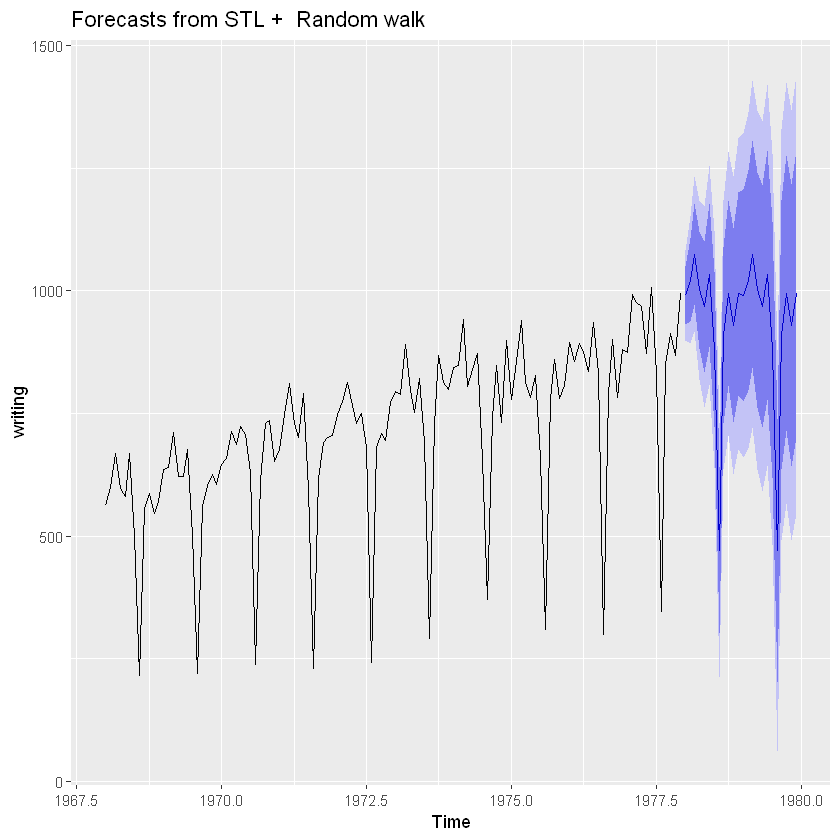

In [40]:
autoplot(stlf(writing, method='naive'))

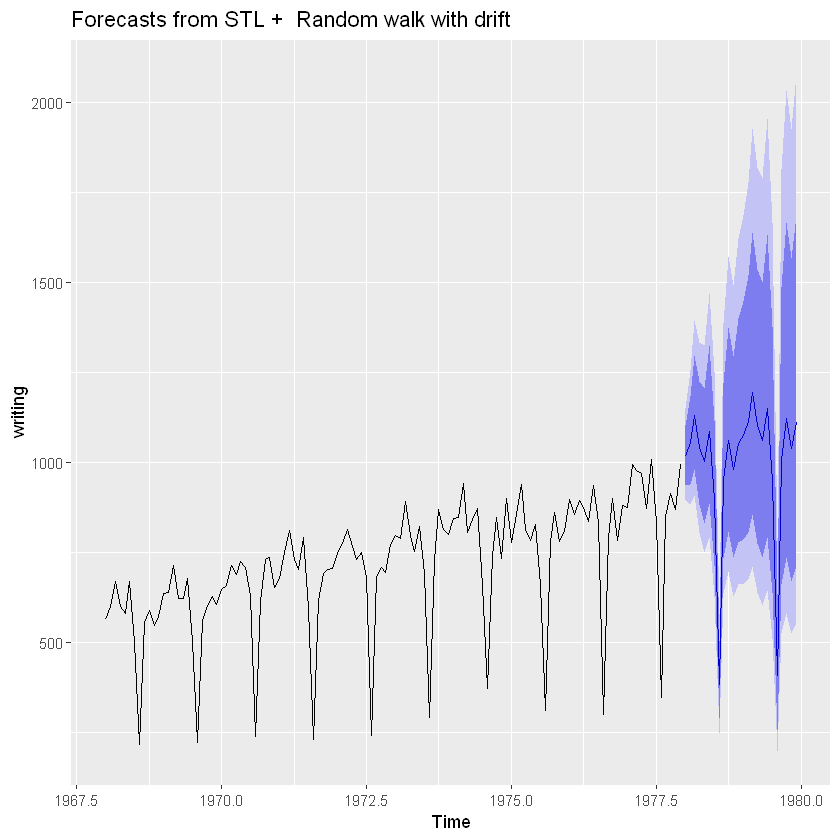

In [41]:
autoplot(stlf(writing, method='rwdrift', robust=TRUE, lambda = BoxCox.lambda(writing)))

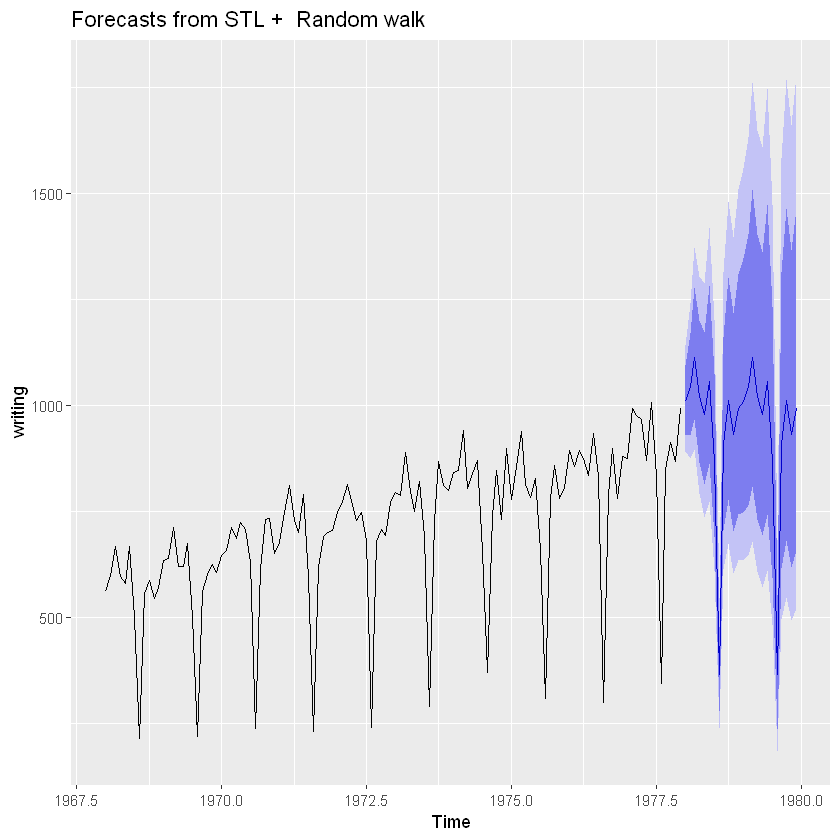

In [42]:
autoplot(stlf(writing, method='naive', robust=TRUE, lambda = BoxCox.lambda(writing)))

# 8. Use stlf() to produce forecasts of the fancy series with either method=“naive” or method=“rwdrift”, whichever is most appropriate. Use the lambda argument if you think a Box-Cox transformation is required.

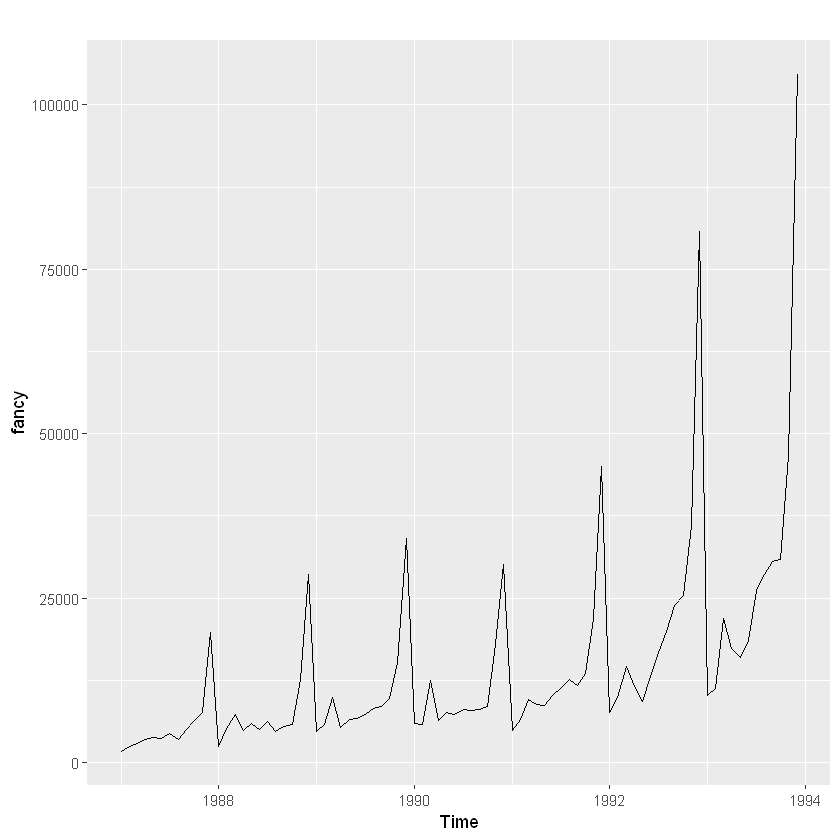

In [43]:
autoplot(fancy)

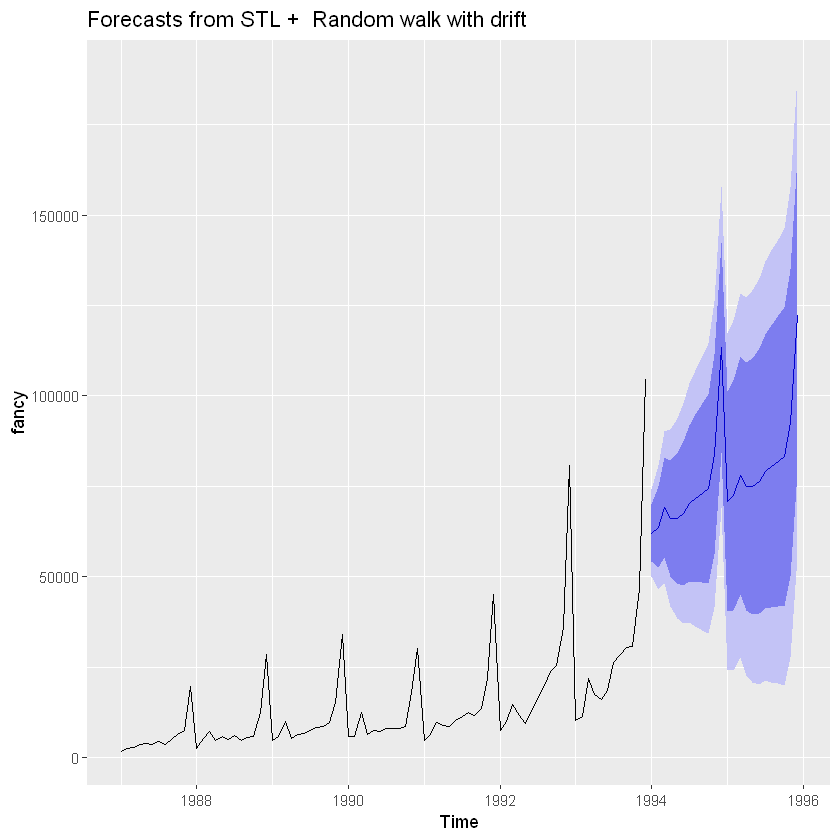

In [44]:
autoplot(stlf(fancy, method='rwdrift'))

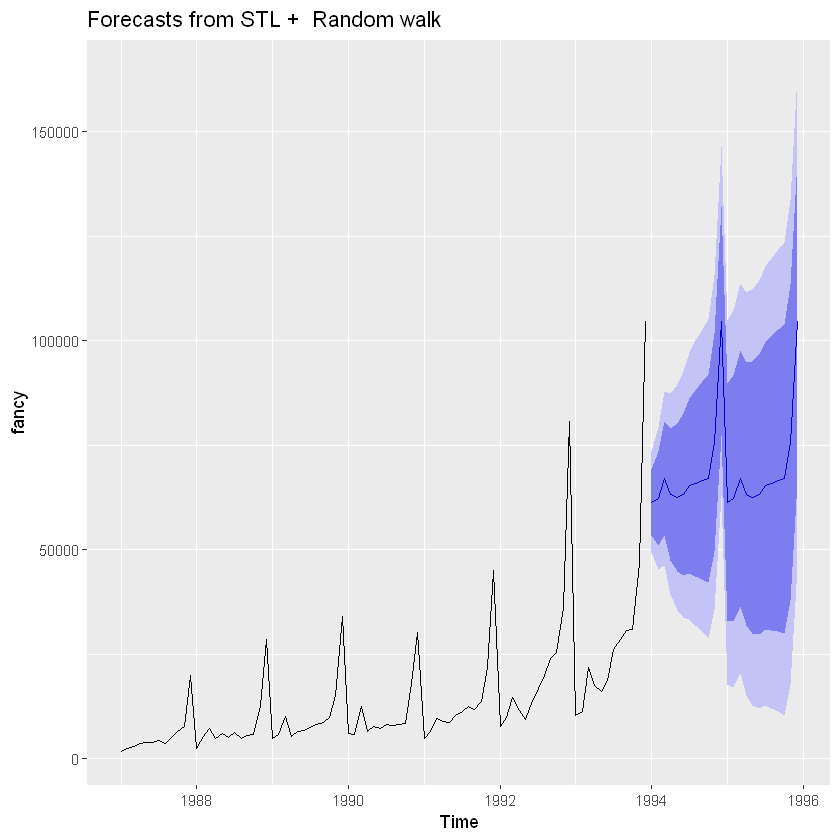

In [45]:
autoplot(stlf(fancy, method='naive'))

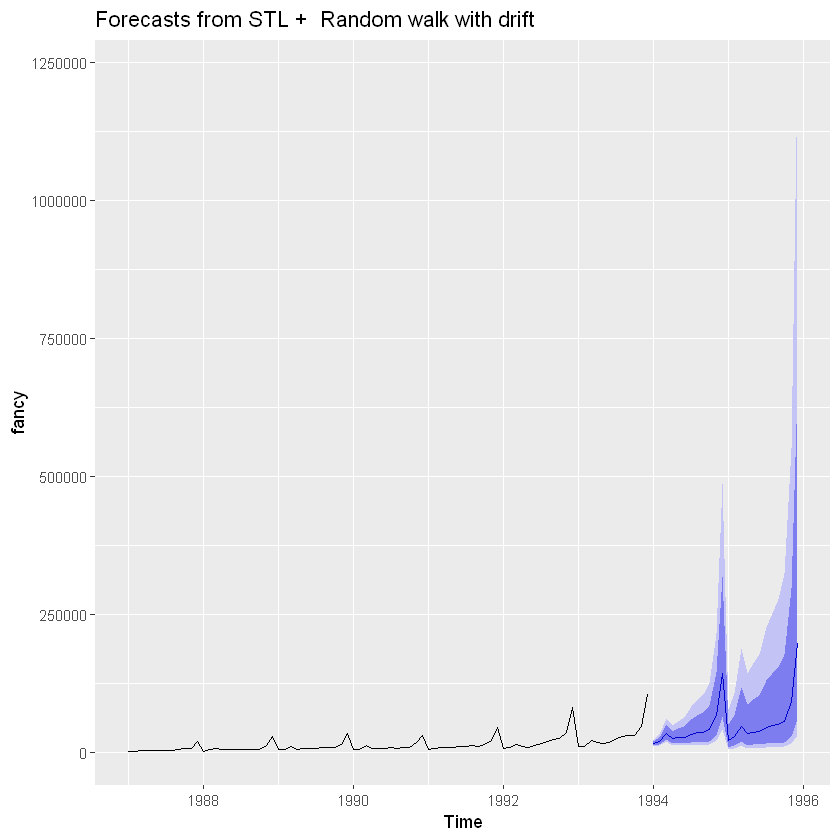

In [46]:
autoplot(stlf(fancy, method='rwdrift', robust=TRUE, lambda = BoxCox.lambda(fancy)))

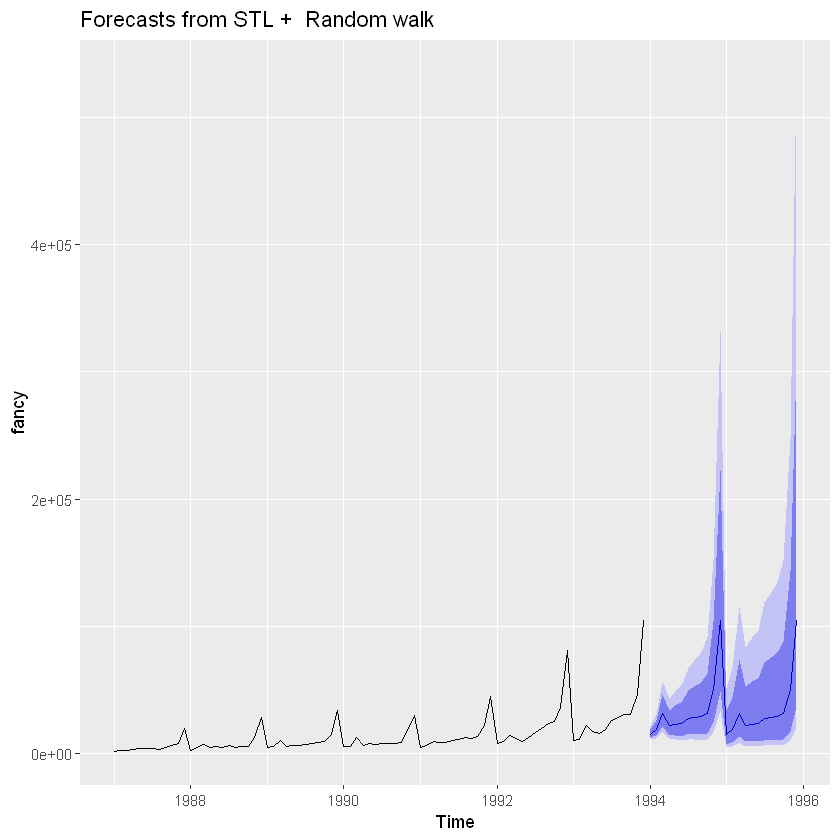

In [47]:
autoplot(stlf(fancy, method='naive', robust=TRUE, lambda = BoxCox.lambda(fancy)))